# Declaring paths and variables

In [2]:
batch_size = 32
epochs = 100
channels = 3
img_height = 256
img_width = 256
learning_rate = 0.0001
train_dir = '../input/rgbeurosat/RBG/train'
val_dir = '../input/rgbeurosat/RBG/val'
test_dir = '../input/rgbeurosat/RBG/test'

# Loading data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    horizontal_flip=True,
    zoom_range=0.3
)

In [4]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [5]:
train_data = train_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 21600 images belonging to 10 classes.


In [6]:
val_data = validation_data_generator.flow_from_directory(
    batch_size=batch_size,
    directory=val_dir,
    shuffle=True,
    target_size=(img_height, img_width),
    class_mode='categorical'
)

Found 2700 images belonging to 10 classes.


# Building model

In [7]:
# importing libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import Adam

# build a sequential model

model = Sequential()
model.add(InputLayer(input_shape=(img_height, img_width, channels)))

# 1st conv block

model.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 2nd conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 4th conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 5th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 6th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 7th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 8th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 9th conv block

model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 10th conv bock

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# ANN block

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer

model.add(Dense(units=10, activation='softmax'))


# compile model

opt = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 8)       32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4

In [8]:
from keras.callbacks import ModelCheckpoint

mcp_save = ModelCheckpoint('PKNet.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Running Model

In [9]:
history = model.fit_generator(
    train_data,
    epochs=epochs,
    validation_data=val_data,
    steps_per_epoch=24,
    validation_steps=10,
    callbacks=[mcp_save]
)

Epoch 1/100
24/24 [==============================] - 12s 512ms/step - loss: 2.0220 - accuracy: 0.2982 - val_loss: 2.3295 - val_accuracy: 0.1094
Epoch 2/100
24/24 [==============================] - 12s 514ms/step - loss: 1.6083 - accuracy: 0.4414 - val_loss: 2.3845 - val_accuracy: 0.1187
Epoch 3/100
24/24 [==============================] - 12s 510ms/step - loss: 1.4420 - accuracy: 0.5273 - val_loss: 2.5844 - val_accuracy: 0.1094
Epoch 4/100
24/24 [==============================] - 12s 492ms/step - loss: 1.3612 - accuracy: 0.5143 - val_loss: 2.9916 - val_accuracy: 0.1000
Epoch 5/100
24/24 [==============================] - 12s 504ms/step - loss: 1.3159 - accuracy: 0.5534 - val_loss: 3.5322 - val_accuracy: 0.1312
Epoch 6/100
24/24 [==============================] - 12s 493ms/step - loss: 1.2832 - accuracy: 0.5378 - val_loss: 4.3117 - val_accuracy: 0.1063
Epoch 7/100
24/24 [==============================] - 12s 481ms/step - loss: 1.2024 - accuracy: 0.5846 - val_loss: 4.7903 - val_accuracy:

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import Adam

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(img_height, img_width, channels)))

# 1st conv block
model.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 2nd conv block
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 4th conv block
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 5th conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 6th conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 7th conv block
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 8th conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 9th conv block
model.add(Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 10th conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# ANN block
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))  # Updated dense layer units to 4096
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer
model.add(Dense(units=10, activation='softmax'))

# compile model
opt = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 8)       224       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 8)       0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 112, 112, 8)       32        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 112, 112, 16)      1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 56, 56, 16)        64        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 56, 56, 32)       

# Plotting Metrics

In [10]:
import matplotlib.pyplot as plt

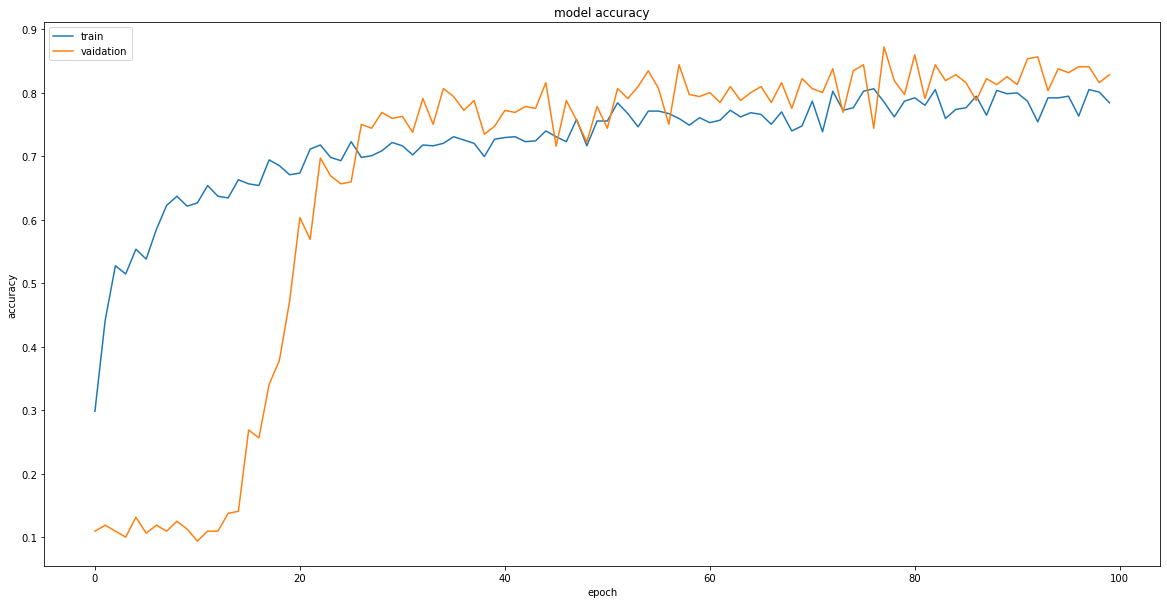

In [11]:
plt.figure(figsize = (20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()

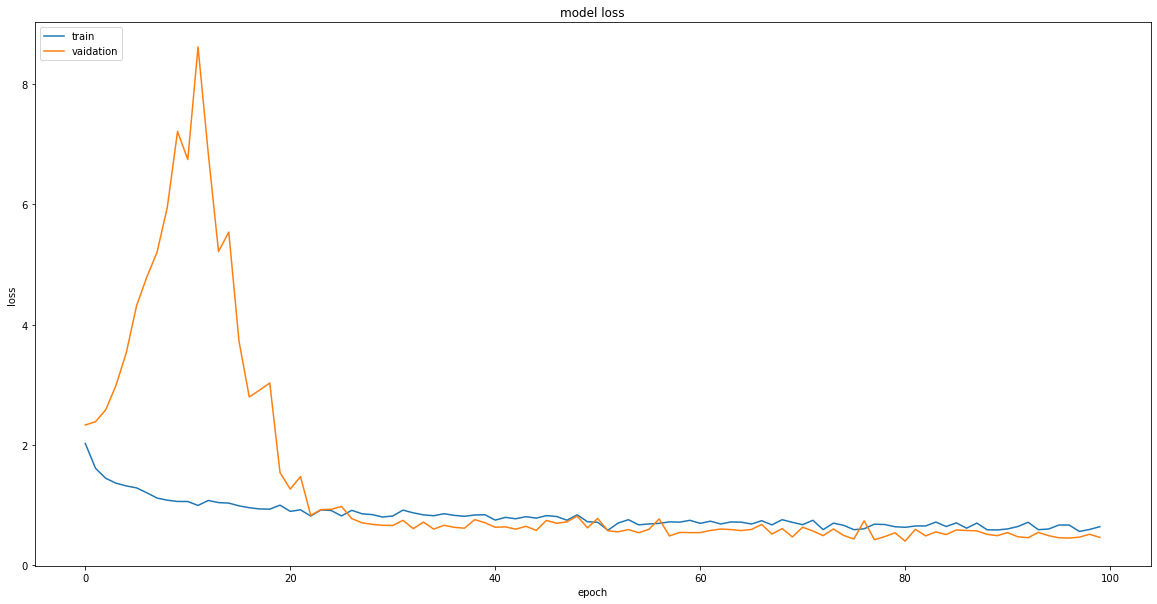

In [12]:
plt.figure(figsize = (20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vaidation'], loc='upper left')
plt.show()

# Loading test data

In [13]:
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [14]:
test_data = test_data_generator.flow_from_directory(
    batch_size=1,
    directory=test_dir,
    shuffle=False,
    target_size=(img_height, img_width),
    class_mode='categorical'
)
idx2label_dict = {test_data.class_indices[k]: k for k in test_data.class_indices}

Found 2700 images belonging to 10 classes.


# Predicting values

In [15]:
import time 

model.load_weights('PKNet.h5')
inference_times = []
for i in range(5):
    start_time = time.time()
    y_pred = model.predict_generator(test_data, steps=2700)
    inference_time = time.time() - start_time
    inference_times.append(inference_time)
print('Average inference time: %.2f seconds' % (sum(inference_times)/len(inference_times)))
y_true = test_data.classes

Average inference time: 8.17 seconds


In [16]:
import numpy as np

y_pred = np.argmax(y_pred, axis = 1)

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [18]:
def get_key(mydict,val): 
    for key, value in mydict.items(): 
         if val == value: 
             return key 

In [19]:
def find_metrics(y_true, y_pred, idx2label_dict, class_name):
    cm = confusion_matrix(y_true, y_pred)
    out1 = np.sum(cm, axis = 1)
    out2 = np.sum(cm, axis = 0)
    id = get_key(idx2label_dict, class_name)
    r1 = cm[id][id]/out1[id]
    r2 = cm[id][id]/out2[id]
    s = cm[id][id]
    return (r1, r2, s)

# Precision and Recall

In [20]:
import prettytable

table = prettytable.PrettyTable(['Class', 'Recall', 'Precision', 'Accuracy', 'F1 Score'])
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']
sum = 0

cm = confusion_matrix(y_true, y_pred)
cm_sum = np.sum(cm)
col_sum = np.sum(cm, axis = 0)
row_sum = np.sum(cm, axis = 1)

class_acc = []

row = len(cm)

for x in range(0,row):
    tp = cm[x][x] 
    fp = row_sum[x] - cm[x][x]
    fn = col_sum[x] - cm[x][x]
    tn = cm_sum - row_sum[x]- col_sum[x] + cm[x][x]

    temp = (tp+tn)/(tp+fn+fp+tn)
    class_acc.append(temp)

temp = 0    
for _class in class_names:
    result1, result2, s = find_metrics(y_true, y_pred, idx2label_dict, _class)
    sum += s
    f1 = (2*(result1* result2))/ (result1 + result2)
    table.add_row([_class, round(result1, 2), round(result2, 2), round(class_acc[temp], 2), round(f1, 2)])
    temp +=1
print(table)
print("Accuracy: %.2f" % (sum/2700*100))

+----------------------+--------+-----------+----------+----------+
|        Class         | Recall | Precision | Accuracy | F1 Score |
+----------------------+--------+-----------+----------+----------+
|      AnnualCrop      |  0.78  |    0.91   |   0.97   |   0.84   |
|        Forest        |  0.97  |    0.94   |   0.99   |   0.95   |
| HerbaceousVegetation |  0.64  |    0.85   |   0.95   |   0.73   |
|       Highway        |  0.66  |    0.62   |   0.93   |   0.64   |
|      Industrial      |  0.94  |    0.8    |   0.97   |   0.87   |
|       Pasture        |  0.88  |    0.74   |   0.97   |   0.81   |
|    PermanentCrop     |  0.72  |    0.71   |   0.95   |   0.72   |
|     Residential      |  0.96  |    0.87   |   0.98   |   0.91   |
|        River         |  0.76  |    0.77   |   0.96   |   0.77   |
|       SeaLake        |  0.92  |    1.0    |   0.99   |   0.96   |
+----------------------+--------+-----------+----------+----------+
Accuracy: 82.59


# Confusion Matrix

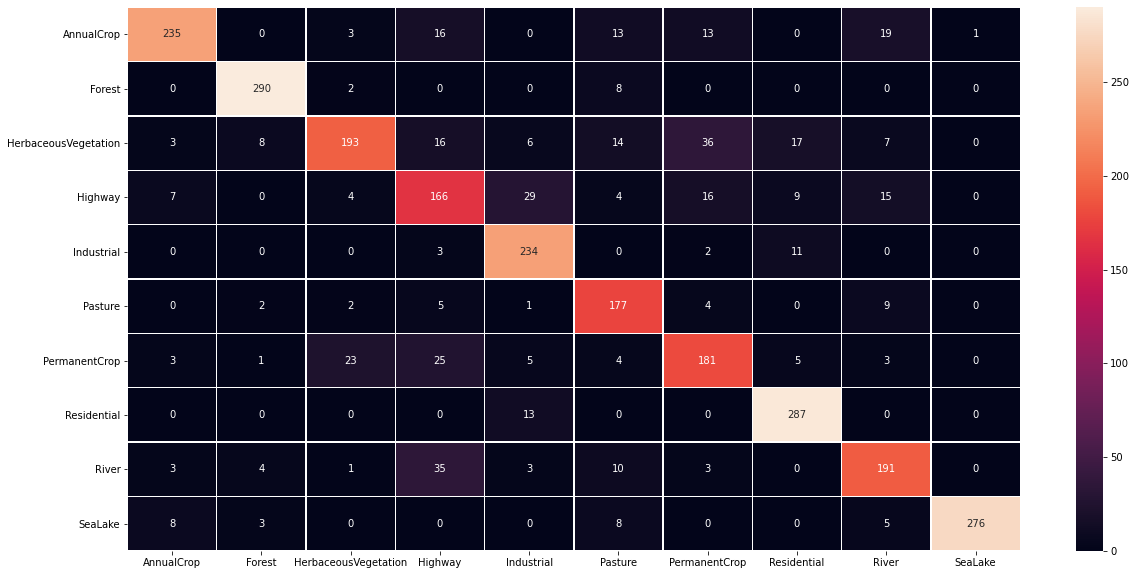

In [21]:
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index = [idx2label_dict[int(i)] for i in "0123456789"], columns = [idx2label_dict[int(i)] for i in "0123456789"])
plt.figure(figsize = (20,10))
sn.heatmap(df_cm, annot=True, linewidths=.5, fmt="d")

In [22]:
model.save('/kaggle/working/Classificationmodelsatellite-imagery.h5')

In [31]:
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.models import load_model

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/newrgdfssaacat/AA Image_0_0.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted class label:", predicted_class_label)

Predicted class label: Residential


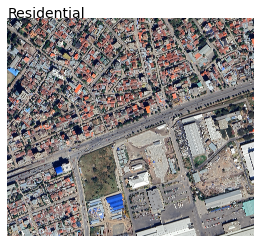

In [33]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/newrgdfssaacat/AA Image_0_0.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

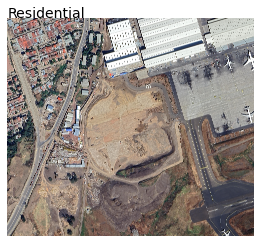

In [38]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/classificationdrfete/AA Image_0_1.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (104267776 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


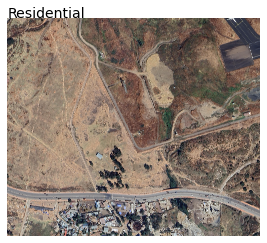

In [39]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/classificationdrfete/AA Image_0_2.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

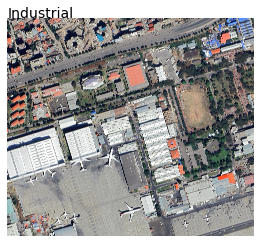

In [41]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/classificationdrfete/AA Image_1_0.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

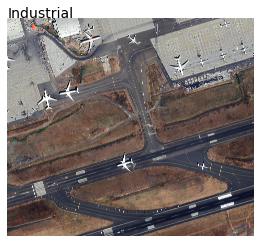

In [42]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/classificationdrfete/AA Image_1_1.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2835: DecompressionBombWarning: Image size (96993280 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


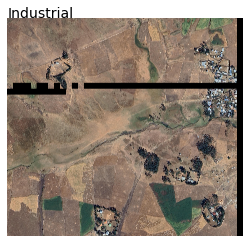

In [43]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/trreeddffgg/AA Image_4_2.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

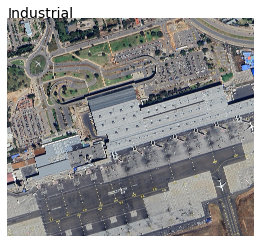

In [44]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/dfghjklllppiiuytrrewq/AA Image_2_0.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

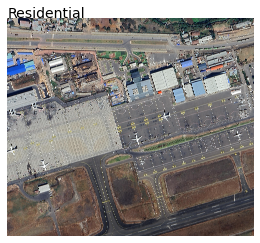

In [46]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/dfghjklllppiiuytrrewq/AA Image_3_0.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

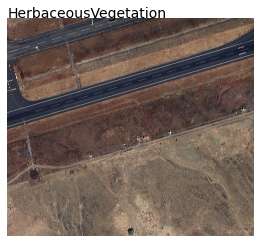

In [47]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/dfghjklllppiiuytrrewq/AA Image_3_1.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

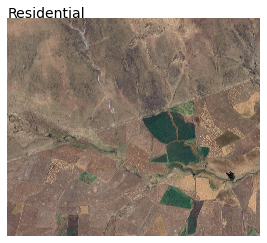

In [48]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/dfghjklllppiiuytrrewq/AA Image_3_2.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()

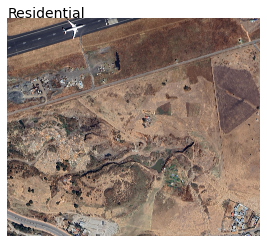

In [49]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((img_width, img_height))  # Resize the image to match the expected input shape
    image = np.array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Define the class labels
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']  # Replace with your actual class labels

# Path to the input image you want to classify
input_image_path = '/kaggle/input/geeerrrrrrrrrrrrrrrrr/AA Image_1_2.jpg'

# Load the model architecture and weights
model = tf.keras.models.load_model('/kaggle/working/Classificationmodelsatellite-imagery.h5')  # Replace with the path to your saved model

# Get the expected input shape from the model
img_height, img_width, channels = model.input_shape[1:]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions
predictions = model.predict(input_image)
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Load and plot the input image
input_image = Image.open(input_image_path)
plt.imshow(input_image)
plt.axis('off')

# Write the predicted label above the plot
plt.text(0, -20,  predicted_class_label, fontsize=14)

# Show the plot
plt.show()